In [1]:
import spacy
import pickle
import pandas as pd

from newsapi import NewsApiClient

nlg_eng =  spacy.load("en_core_web_lg")
# newsapi = NewsApiClient (api_key='f93eb6917d6c42e5898bb8a588364246')
# articles = []

# for i in range(1,6):
#     temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-24', to='2021-03-23', sort_by='relevancy', page=i)
#     articles.append(temp)


In [70]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))


In [2]:
filename = 'articlesCOVID.pckl'
articles = pickle.load(open(filename, 'rb'))

dados = []
for i in articles:
    for article in i['articles']:
        title = article['title']
        description = article['description']
        content = article['content']
        date = article['publishedAt']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
        
df = pd.DataFrame(dados)
df = df.dropna()
df

,title,date,desc,content
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...
2,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...
3,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...
4,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ..."
...,...,...,...,...
95,Biden’s Speech Will Kick Off Stimulus Promotio...,2021-03-11T16:19:48Z,President Biden is set to deliver an address j...,"LiveUpdated March 11, 2021, 11:22 a.m. ET\r\nM..."
96,"Confident of Supply, More U.S. States Expand A...",2021-03-11T10:41:23Z,The coronavirus was declared a pandemic exactl...,"LiveUpdated March 11, 2021, 5:40 a.m. ET\r\nMa..."
97,Seattle’s Virus Success Shows What Could Have ...,2021-03-11T10:00:34Z,The Seattle area once had more coronavirus dea...,Researchers at the University of Oxford determ...
98,Chinese mobile games are gaining ground in the US,2021-02-24T13:40:50Z,"Over the past year, the coronavirus crisis has...","Over the past year, the coronavirus crisis has..."


In [18]:
from collections import Counter

def get_keywords_eng(text):
    
    doc = nlg_eng(text)
    result = []
    
    for token in doc:
        if (not token.is_stop and
             not token.is_punct and (token.pos_ == "NOUN" or token.pos_ == "VERB" or token.pos_ == "PROPN")):
            result.append(token.text)
    return result

data = df.values.tolist()

keywords = []

# the index of keywords represent the position of article
for i in data:
    word_freq = Counter(get_keywords_eng(i[3]))
    common_words = word_freq.most_common(5)
    keywords.append(common_words)
    
df['keywords'] = keywords

# filename = 'articlesCOVID2.pckl'
# pickle.dump(df, open(filename, 'wb'))

df['keywords'].head(10)


0    [(going, 3), (think, 2), (months, 2), (look, 1...
1    [(Knight, 2), (seen, 1), (Wayne, 1), (ads, 1),...
2    [(efforts, 1), (scaled, 1), (country, 1), (str...
3    [(ethicists, 1), (list, 1), (suggests, 1), (ri...
4    [(Green, 2), (Passport, 2), (system, 1), (work...
5    [(vaccine, 2), (sharing, 1), (program, 1), (Co...
6    [(Artists, 1), (institutions, 1), (struggling,...
7    [(pandemic, 2), (readers, 2), (year, 1), (Time...
8    [(health, 2), (Community, 1), (centers, 1), (A...
9    [(know, 1), (blip, 1), (resume, 1), (progress,...
Name: keywords, dtype: object

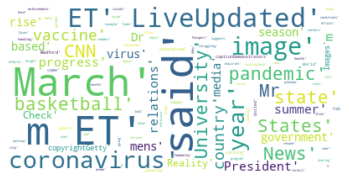

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(keywords)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
